In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV (update path as needed)
df = pd.read_csv("C:/Users/SOUVIK/OneDrive/Documents/us_age_gender.csv")

In [3]:
# Sample shape: columns = ['Age Group','Male','Female']
print(df.head())

  Age Group     Male   Female
0       0-4  1050000  1000000
1       5-9  1100000  1050000
2     10-14  1150000  1100000
3     15-19  1200000  1150000
4     20-24  1250000  1200000


In [4]:
# 1. Bar chart: Gender counts across age groups
df_melt = df.melt(id_vars=['Age Group'], value_vars=['Male','Female'],
                 var_name='Gender', value_name='Count')

plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

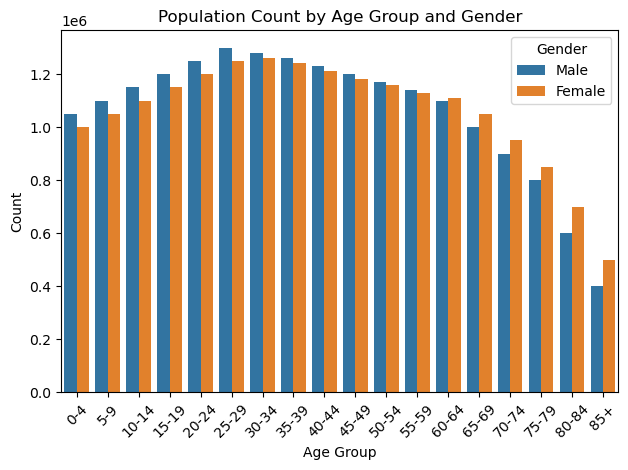

In [5]:
import seaborn as sns
sns.barplot(data=df_melt, x='Age Group', y='Count', hue='Gender')
plt.xticks(rotation=45)
plt.title('Population Count by Age Group and Gender')
plt.tight_layout()
plt.show()

In [6]:
# 2. Histogram: treat age midpoints as continuous distribution
# First define midpoints
mid = df['Age Group'].str.extract(r'(\d+)-?(\d+)?')
mid = mid.fillna(method='ffill').astype(int)
df['mid_age'] = mid.mean(axis=1).astype(int)

C:\Users\KOUSHIK\AppData\Local\Temp\ipykernel_15220\2797253308.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mid = mid.fillna(method='ffill').astype(int)


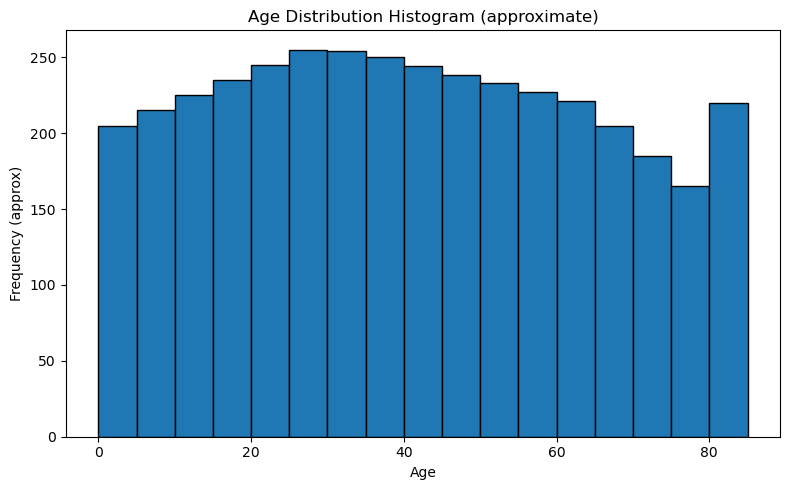

In [7]:
# Create a sample continuous array by repeating mid ages weighted
ages = df.loc[df.index.repeat(df['Male'] // 10000), 'mid_age'].tolist() + \
       df.loc[df.index.repeat(df['Female'] // 10000), 'mid_age'].tolist()

plt.figure(figsize=(8,5))
plt.hist(ages, bins=range(0, 90, 5), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency (approx)')
plt.title('Age Distribution Histogram (approximate)')
plt.tight_layout()
plt.show()